<a href="https://colab.research.google.com/github/hecshzye/food-or-not-model/blob/main/convolutional_neural_network_and_computer_vision_with_tensorflow_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Convolutional Neural Network` and `Computer Vision` with `TensorFlow`

#### This is a practice and rough work notebook for the upcoming `CNN & Computer Vision` `projects` (food-or-not-food, etc).
#### If something from this practice notes look usable or meaningful, please do not hesistate to work on it and experiment further.

Working with the `Food 101` dataset from `Kaggle` - https://www.kaggle.com/dansbecker/food-101

In [1]:
# Using a slightly modified small version of the data set which is formatted for pizza or steak modelling
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/CNN-Computer-vision-data/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

#### Exploratory Data Analysis 

In [2]:
import os 
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f" {len(dirnames)} directories and {len(filenames)} images in '{dirpath}' .")

 2 directories and 0 images in 'pizza_steak' .
 2 directories and 0 images in 'pizza_steak/train' .
 0 directories and 750 images in 'pizza_steak/train/pizza' .
 0 directories and 750 images in 'pizza_steak/train/steak' .
 2 directories and 0 images in 'pizza_steak/test' .
 0 directories and 250 images in 'pizza_steak/test/pizza' .
 0 directories and 250 images in 'pizza_steak/test/steak' .


In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import tensorflow as tf
import sklearn   # Just importing to learn more from the data whilst EDA incase.

# Analysing the training dataset
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['pizza' 'steak']


In [4]:
import matplotlib.image as mpimg
import random

def random_image_viewer(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Shape: {img.shape}")
  return img 

Shape: (382, 512, 3)


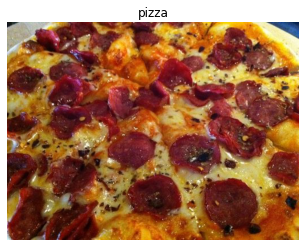

In [ ]:
img = random_image_viewer(target_dir="pizza_steak/train/", target_class="pizza") # Yum!

Shape: (512, 512, 3)


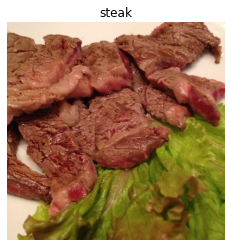

In [ ]:
img = random_image_viewer(target_dir="pizza_steak/train/", target_class="steak")

#### Preprocessing (Normalization)

In [5]:
# Scaling the data (32, 224, 224, 3)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)
train_data_gen = ImageDataGenerator(rescale=1./255)
valid_data_gen = ImageDataGenerator(rescale=1./225)

# Converting data into batches
train_data = train_data_gen.flow_from_directory("/content/pizza_steak/train",
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42)
valid_data = valid_data_gen.flow_from_directory("/content/pizza_steak/test",
                                                batch_size=32,
                                                target_size=(224, 224),
                                                class_mode="binary",
                                                seed=42)
# Modelling
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
# Compiling
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 26s 258ms/step - loss: 0.6005 - accuracy: 0.6500 - val_loss: 0.4071 - val_accuracy: 0.8300
Epoch 2/5
47/47 [==============================] - 11s 231ms/step - loss: 0.4205 - accuracy: 0.8093 - val_loss: 0.3233 - val_accuracy: 0.8620
Epoch 3/5
47/47 [==============================] - 11s 232ms/step - loss: 0.3971 - accuracy: 0.8240 - val_loss: 0.3397 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 11s 229ms/step - loss: 0.3410 - accuracy: 0.8493 - val_loss: 0.2826 - val_accuracy: 0.8820
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.3169 - accuracy: 0.8780 - val_loss: 0.2969 - val_accuracy: 0.8700


### Trained on the backened GPU 

In [6]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

This baseline model is not overfitting right now because the val_loss is not increasing.
Looks like the model might need some hyperparameter tuning without over-fitting.


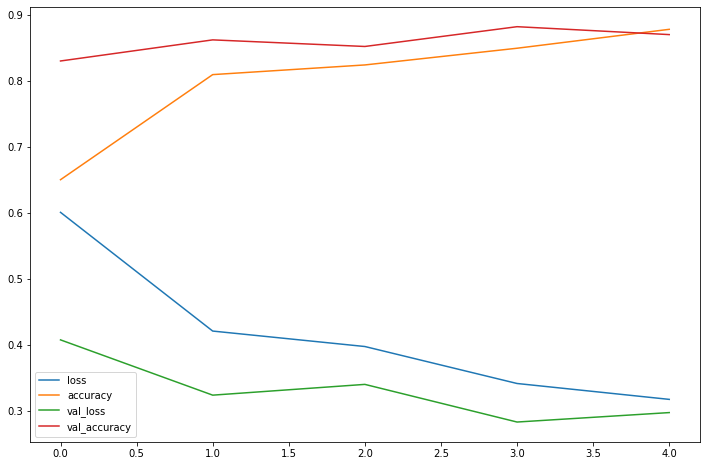

In [7]:
# Evaluating the training curves
import pandas as pd
pd.DataFrame(history_1.history).plot(figsize=(12, 8));

In [33]:
def plot_loss_curves(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history["loss"]))
  
  plt.figure()
  plt.plot(epochs, loss, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

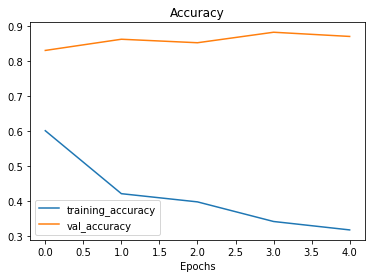

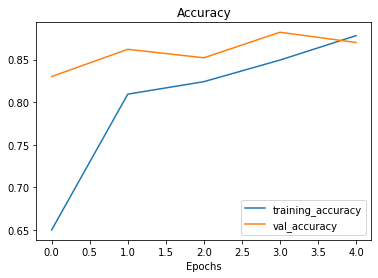

In [34]:
plot_loss_curves(history_1)

In [8]:
print(class_names)

['pizza' 'steak']


## Predictions 

In [16]:
# Function to pre-process an image
def import_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/225.
  return img

--2022-01-05 10:13:14--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2022-01-05 10:13:15 (33.8 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



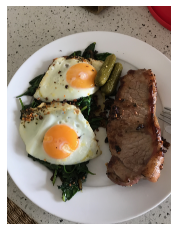

In [48]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [49]:
steak.shape

(4032, 3024, 3)

In [50]:
steak = import_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7227778 , 0.705     , 0.6561111 ],
        [0.7372222 , 0.7161111 , 0.66833335],
        [0.7161111 , 0.6894444 , 0.63611114],
        ...,
        [0.5911111 , 0.05777778, 0.10222222],
        [0.5611111 , 0.04777778, 0.08      ],
        [0.5988889 , 0.08777778, 0.11888889]],

       [[0.75      , 0.7322222 , 0.69222224],
        [0.7238889 , 0.70611113, 0.6527778 ],
        [0.74333334, 0.71666664, 0.66333336],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.60055554, 0.06722222, 0.10722222],
        [0.5827778 , 0.06277778, 0.09833334]],

       [[0.73888886, 0.7211111 , 0.6677778 ],
        [0.72444445, 0.69555557, 0.6433333 ],
        [0.7438889 , 0.71055555, 0.66055554],
        ...,
        [0.6022222 , 0.07333333, 0.09111111],
        [0.5977778 , 0.07777778, 0.11333334],
        [0.5922222 , 0.05888889, 0.09888889]],

       ...,

       [[0.5588889 , 0.48444444, 0.35166666],
        [0.06

In [51]:
steak = tf.expand_dims(steak, axis=0)
print(steak.shape)

(1, 224, 224, 3)


In [52]:
pred = model_1.predict(steak)
pred

array([[0.9010715]], dtype=float32)

In [53]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [54]:
# Function to predict

def pred_plot(model, filename, class_names):
  img = import_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediciton: {pred_class}")
  plt.axis(False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


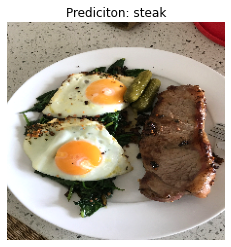

In [56]:
pred_plot(model_1, "03-steak.jpeg", class_names);

--2022-01-05 10:25:35--  https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/pizza_001.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220203 (215K) [image/jpeg]
Saving to: ‘pizza_001.jpeg’

pizza_001.jpeg      100%[===================>] 215.04K  --.-KB/s    in 0.03s   

2022-01-05 10:25:35 (7.93 MB/s) - ‘pizza_001.jpeg’ saved [220203/220203]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


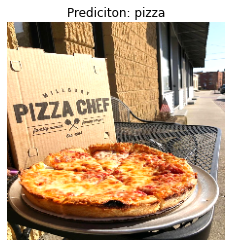

In [62]:
# Predicting some more

!wget https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/pizza_001.jpeg
pred_plot(model_1, "pizza_001.jpeg", class_names)

--2022-01-05 10:27:17--  https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/steak_003.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 404356 (395K) [image/jpeg]
Saving to: ‘steak_003.jpeg’

steak_003.jpeg      100%[===================>] 394.88K  --.-KB/s    in 0.04s   

2022-01-05 10:27:17 (10.8 MB/s) - ‘steak_003.jpeg’ saved [404356/404356]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


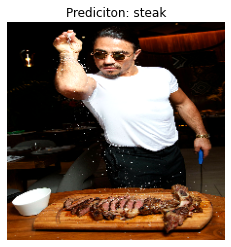

In [63]:
!wget https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/steak_003.jpeg
pred_plot(model_1, "steak_003.jpeg", class_names)

--2022-01-05 10:28:02--  https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/steak_002.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89553 (87K) [image/jpeg]
Saving to: ‘steak_002.jpeg’

steak_002.jpeg      100%[===================>]  87.45K  --.-KB/s    in 0.01s   

2022-01-05 10:28:02 (6.62 MB/s) - ‘steak_002.jpeg’ saved [89553/89553]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


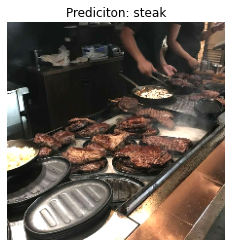

In [64]:
!wget https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/steak_002.jpeg
pred_plot(model_1, "steak_002.jpeg", class_names)

--2022-01-05 10:28:54--  https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/pizza_002.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1047918 (1023K) [image/jpeg]
Saving to: ‘pizza_002.jpeg’

pizza_002.jpeg      100%[===================>]   1023K  --.-KB/s    in 0.05s   

2022-01-05 10:28:54 (19.9 MB/s) - ‘pizza_002.jpeg’ saved [1047918/1047918]



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


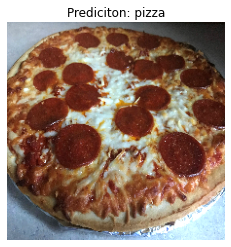

In [65]:
!wget https://raw.githubusercontent.com/hecshzye/food-or-not-model/main/pizza_002.jpeg
pred_plot(model_1, "pizza_002.jpeg", class_names)